# 1. Install Dependencies and Setup

In [285]:
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [286]:
# !pip list

In [287]:
import tensorflow as tf
import os

In [288]:
# # Avoid OOM errors by setting GPU Memory Consumption Growth
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus: 
#     tf.config.experimental.set_memory_growth(gpu, True)

In [289]:
# tf.config.list_physical_devices('GPU')

# 2. Remove dodgy images

In [290]:
import cv2
import imghdr

In [291]:
# data_dir = 'data' 

In [292]:
# image_exts = ['jpeg','jpg', 'bmp', 'png']

In [293]:
# for image_class in os.listdir(data_dir): 
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try: 
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts: 
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e: 
#             print('Issue with image {}'.format(image_path))
#             # os.remove(image_path)

# 3. Load Data

In [294]:
import numpy as np
from matplotlib import pyplot as plt

In [295]:
data = tf.keras.utils.image_dataset_from_directory('../dataset')

Found 196 files belonging to 2 classes.


In [296]:
data_iterator = data.as_numpy_iterator()

In [297]:
batch = data_iterator.next()

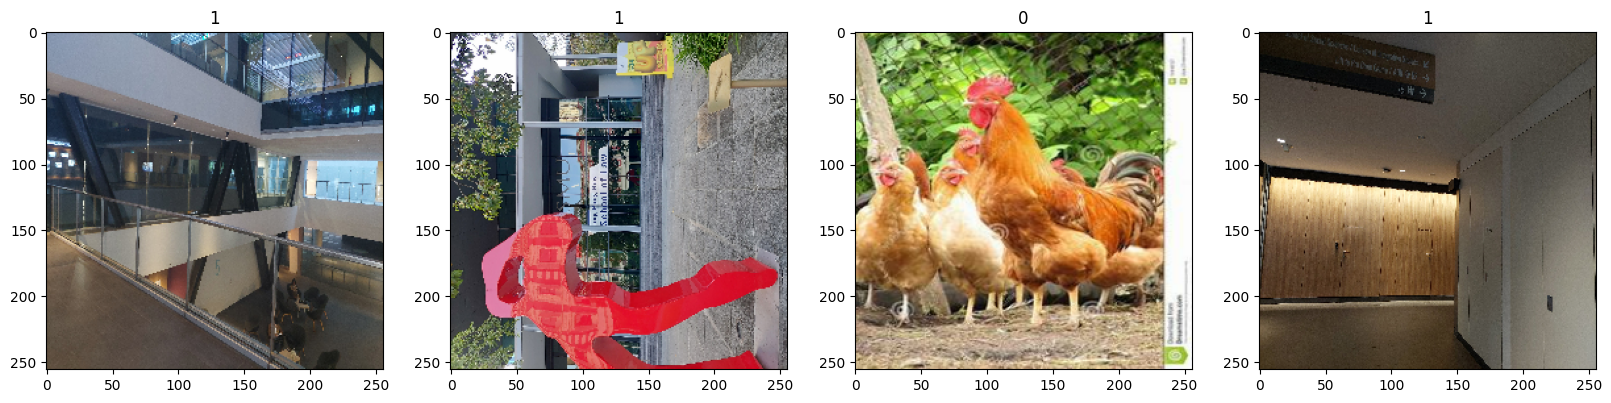

In [298]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [299]:
data = data.map(lambda x,y: (x/255, y))

In [300]:
data.as_numpy_iterator().next()

(array([[[[2.0107614e-01, 2.0499770e-01, 2.2460555e-01],
          [2.6907551e-01, 2.6907551e-01, 3.0829120e-01],
          [3.8198531e-01, 4.1335785e-01, 4.6433824e-01],
          ...,
          [3.3976331e-01, 3.5544959e-01, 3.5937116e-01],
          [3.4245557e-01, 3.5814184e-01, 3.6206341e-01],
          [3.4617418e-01, 3.6186045e-01, 3.5793889e-01]],
 
         [[1.9032629e-01, 1.9424786e-01, 2.1263021e-01],
          [3.0841374e-01, 3.1625688e-01, 3.6723730e-01],
          [3.4871325e-01, 3.8400736e-01, 4.4283089e-01],
          ...,
          [3.1808746e-01, 3.4100413e-01, 3.4131050e-01],
          [3.2148820e-01, 3.3717448e-01, 3.3325291e-01],
          [3.3281633e-01, 3.4850261e-01, 3.4458104e-01]],
 
         [[2.6824832e-01, 2.6824832e-01, 3.1176087e-01],
          [2.6324677e-01, 2.7108991e-01, 3.1814873e-01],
          [3.4928384e-01, 4.0418580e-01, 4.5516622e-01],
          ...,
          [3.4691331e-01, 3.6259958e-01, 3.6652115e-01],
          [3.3491498e-01, 3.5060126e-

# 5. Split Data

In [301]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [302]:
train_size

4

In [303]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [304]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [305]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [306]:
model = Sequential()

In [307]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [308]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [309]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 30, 30, 16)       

# 7. Train

In [310]:
logdir='logs'

In [311]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [312]:
hist = model.fit(train, epochs=7, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/7


4/4 [==============================] - 5s 666ms/step - loss: 0.8688 - accuracy: 0.7188 - val_loss: 0.5906 - val_accuracy: 0.6875
Epoch 2/7
4/4 [==============================] - 3s 600ms/step - loss: 0.5574 - accuracy: 0.7656 - val_loss: 0.5552 - val_accuracy: 0.6875
Epoch 3/7
4/4 [==============================] - 3s 601ms/step - loss: 0.4618 - accuracy: 0.7109 - val_loss: 0.2759 - val_accuracy: 0.8438
Epoch 4/7
4/4 [==============================] - 3s 620ms/step - loss: 0.3715 - accuracy: 0.7344 - val_loss: 0.2557 - val_accuracy: 0.8750
Epoch 5/7
4/4 [==============================] - 4s 730ms/step - loss: 0.2827 - accuracy: 0.8594 - val_loss: 0.1023 - val_accuracy: 1.0000
Epoch 6/7
4/4 [==============================] - 4s 722ms/step - loss: 0.2253 - accuracy: 0.9375 - val_loss: 0.1472 - val_accuracy: 0.9688
Epoch 7/7
4/4 [==============================] - 4s 699ms/step - loss: 0.1499 - accuracy: 0.9609 - val_loss: 0.0735 - val_accuracy: 0.9688


# 8. Plot Performance

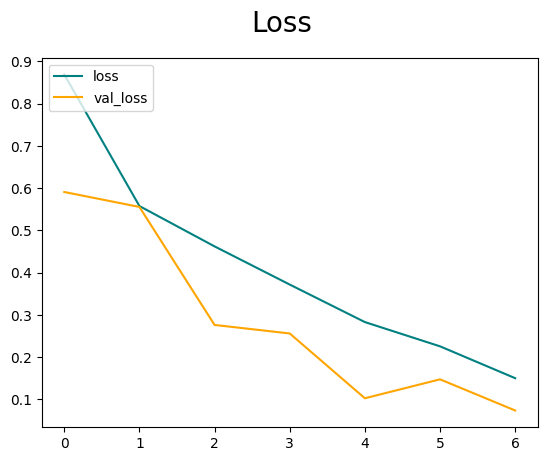

In [313]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

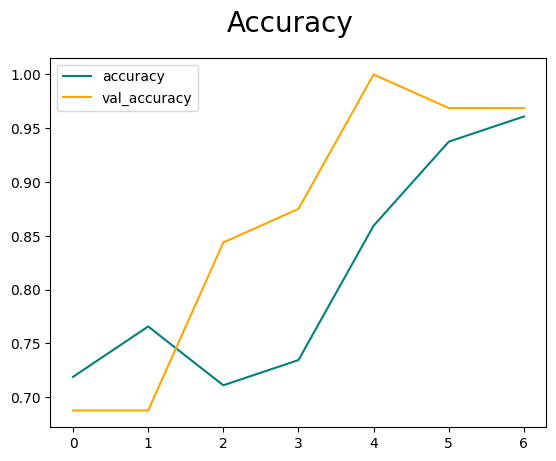

In [314]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [315]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [316]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [317]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [318]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [319]:
import cv2

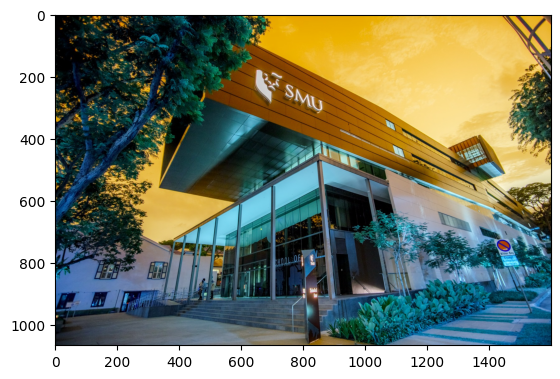

In [353]:
# img = cv2.imread('../dataset/118.jpeg')
# img = cv2.imread('../dataset/test_sol.jpg')
img = cv2.imread('../dataset/sol_test2.jpeg')
plt.imshow(img)
plt.show()

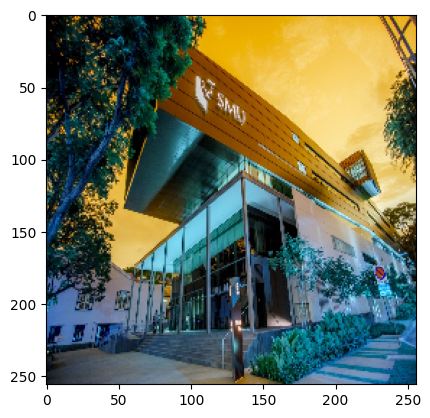

In [354]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [355]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


In [356]:
yhat

array([[0.99953294]], dtype=float32)

In [357]:
if yhat > 0.6: 
    print(f'Predicted class is a chicken')
else:
    print(f'Predicted class is somewhere in SMU')

Predicted class is a chicken


# 11. Save the Model

In [325]:
from tensorflow.keras.models import load_model

In [326]:
model.save(os.path.join('models','imageclassifier.h5'))

In [327]:
new_model = load_model('imageclassifier.h5')

OSError: No file or directory found at imageclassifier.h5

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)